In [1]:
import pandas as pd
import numpy as np
import re
from plotnine import *

## 1. 데이터 호출 및 요약

In [2]:
%ls

LICENSE
README.md
SouthKorea_Apt_presale_price.ipynb
전국_평균_분양가격_2018.7월_.csv


In [3]:
pre_sale = pd.read_csv('전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr')
pre_sale.shape

(2890, 5)

In [4]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [6]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [7]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [8]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

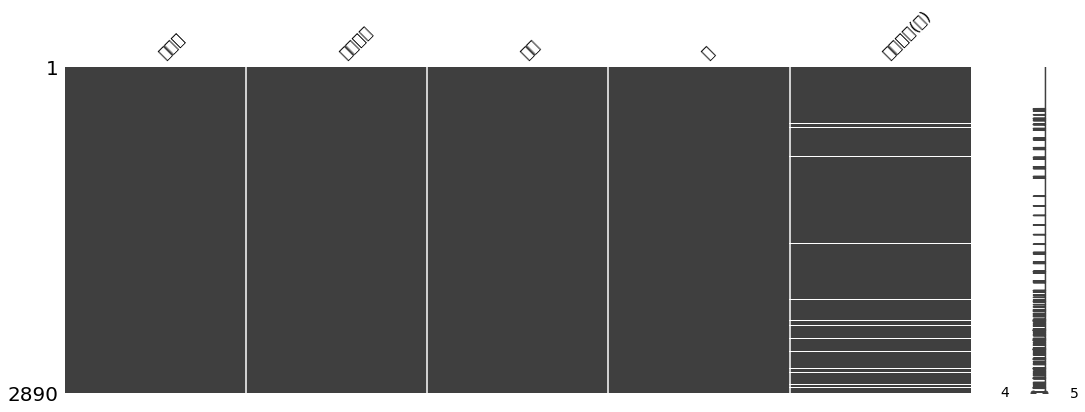

In [9]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18, 6))

In [10]:
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [11]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [12]:
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')

In [13]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격
0,서울,전체,2015,10,5841,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0


In [14]:
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [15]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [16]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [17]:
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [18]:
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    578
전체                   578
전용면적 60㎡초과 85㎡이하     578
전용면적 102㎡초과          578
전용면적 60㎡이하           578
Name: 규모구분, dtype: int64

In [19]:
pre_sale['지역명'].value_counts()

전북    170
세종    170
경기    170
인천    170
강원    170
제주    170
광주    170
울산    170
경북    170
대구    170
서울    170
충남    170
전남    170
부산    170
경남    170
충북    170
대전    170
Name: 지역명, dtype: int64

## 2. group-by와 pivot table 사용

In [59]:
pre_sale

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
5,인천,전체,2015,10,3163,3163.0,10437.9
6,인천,전용면적 60㎡이하,2015,10,3488,3488.0,11510.4
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119,3119.0,10292.7
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545,3545.0,11698.5
9,인천,전용면적 102㎡초과,2015,10,3408,3408.0,11246.4


In [20]:
pre_sale.groupby(pre_sale.연도).describe().T

연도                    2015          2016          2017          2018
분양가격   count    243.000000    984.000000    899.000000    532.000000
       mean    2788.707819   2934.250000   3139.541713   3298.567669
       std      976.861182   1071.441561   1107.584870   1195.955014
       min     1868.000000   1900.000000   1976.000000   2076.000000
       25%     2225.000000   2282.000000   2365.000000   2471.000000
       50%     2516.000000   2672.000000   2849.000000   2914.000000
       75%     3025.500000   3148.500000   3456.000000   3647.250000
       max     7092.000000   8096.000000   7887.000000   8098.000000
평당분양가격 count    243.000000    984.000000    899.000000    532.000000
       mean    9202.735802   9683.025000  10360.487653  10885.273308
       std     3223.641902   3535.757150   3655.030071   3946.651548
       min     6164.400000   6270.000000   6520.800000   6850.800000
       25%     7342.500000   7530.600000   7804.500000   8154.300000
       50%     8302.800000   8817.600000   9401.700000   9616.200000
       75%     9984.150000  10390.050000  11404.800000  12035.925000
       max    23403.600000  26716.800000  26027.100000  26723.400000

In [21]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11235.314563
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10911.633333
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10463.662185
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11483.085542
전체,8893.047059,9293.042647,9901.270588,10563.022689


## 3. 전국 분양가 변동금액

In [25]:
region_year_all = pre_sale.loc[pre_sale['규모구분']=='전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,7159.9,7011.125,7126.8,7640.914286
1,경기,10377.4,11220.000,11850.0,12880.842857
2,경남,7585.6,7847.950,8119.8,8894.442857
3,경북,7170.9,7360.650,7794.9,8341.928571
4,광주,8052.0,8898.725,9463.5,9637.885714
5,대구,9232.3,10310.025,11455.8,11737.157143
6,대전,8098.2,8501.625,9044.7,9604.414286
7,부산,10307.0,10429.925,11577.9,12756.385714
8,서울,19725.2,20663.500,21375.9,22328.742857
9,세종,8750.5,8860.500,9135.3,10374.728571


In [26]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액']) * 1000
min_delta_price = np.min(region_year['변동액']) * 1000
mean_delta_price = np.mean(region_year['변동액']) * 1000

print(max_delta_price)
print(min_delta_price)
print(mean_delta_price)

5087000
369000
1669588.2352941176


In [43]:
region_year[region_year['변동액'] == max_delta_price / 1000]

연도,지역명,2015,2016,2017,2018,변동액
14,제주,7405.2,9129.175,10830.9,12492.385714,5087


In [52]:
region_year[region_year['변동액'] == min_delta_price / 1000]

연도,지역명,2015,2016,2017,2018,변동액
10,울산,10052.9,10208.55,11345.1,10422.342857,369


2015년부터 2018년까지 변동액이 가장 큰 지역은 제주이며, 변동액은 5,087,000원이다.<br/>
2015년부터 2018년까지 변동액이 가장 작은 지역은 울산이며, 변동액은 369,000원이다.

## 4. 데이터 시각화

In [53]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

/Users/jonghobaeck/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 17 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


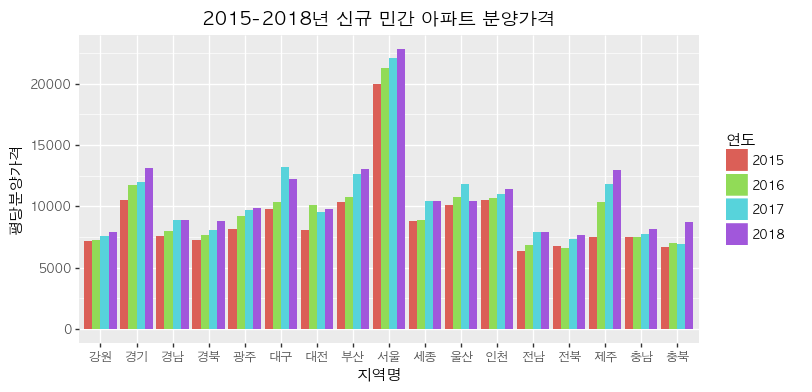

<ggplot: (317544207)>

In [58]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
+ geom_bar(stat='identity', position='dodge')
+ ggtitle('2015-2018년 신규 민간 아파트 분양가격')
+ theme(text=element_text(family='AppleGothic'),
       figure_size=(8,4))
)

In [60]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,7898.700,13646.6,9226.1,8615.900,10296.488889,12334.30,14282.400000,12589.8,22058.2,9291.700000,9974.448000,13835.622581,7567.8,7842.000000,10415.790000,8477.900000,7932.9
전용면적 60㎡이하,7195.400,12384.7,8343.0,7661.500,8517.771429,11284.70,8798.200000,10706.8,22045.7,9106.748276,8964.780000,10869.600000,6991.3,7231.500000,14700.230769,7781.800000,6969.1
전용면적 60㎡초과 85㎡이하,7228.300,11691.1,8110.2,7690.500,9175.500000,10930.70,8807.300000,11191.2,20780.9,9271.800000,10640.600000,10747.600000,6967.6,6890.900000,9943.100000,7503.800000,7044.5
전용면적 85㎡초과 102㎡이하,7685.568,12130.4,9821.9,8776.284,9296.100000,9589.14,9037.430769,11038.7,23754.4,9244.900000,8861.007692,11266.600000,7882.3,7769.583871,10739.347826,9090.033333,8170.6
전체,7196.800,11705.7,8136.7,7696.300,9166.800000,10896.70,8879.900000,11294.9,21168.9,9263.300000,10618.600000,10738.900000,6982.5,6902.200000,10253.100000,7494.200000,6994.3


/Users/jonghobaeck/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


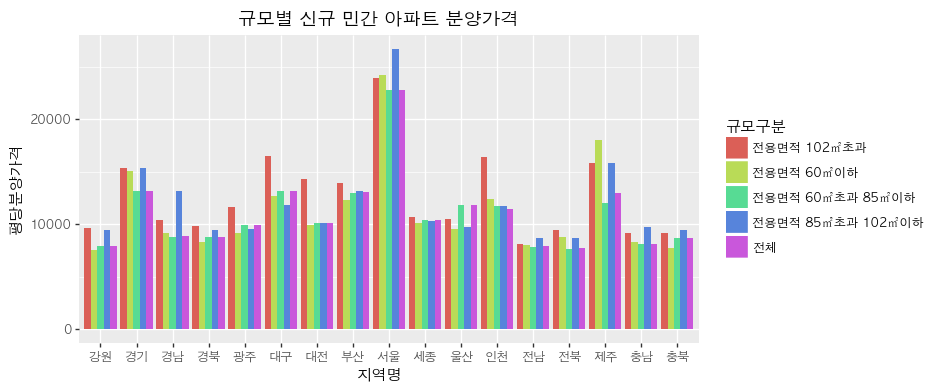

<ggplot: (-9223372036537022071)>

In [62]:
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
+ geom_bar(stat='identity', position='dodge')
+ ggtitle('규모별 신규 민간 아파트 분양가격')
+ theme(text=element_text(family='AppleGothic'),
       figure_size=(8,4))
)